/Users/chau.hoang/miniforge3/envs/SN10/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 345 with name 'Yooldo Verse Mainnet' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(
/Users/chau.hoang/miniforge3/envs/SN10/lib/python3.10/site-packages/eth_utils/network.py:44: UserWarning: Network 12611 with name 'Astar zkEVM' does not have a valid ChainId. eth-typing should be updated with the latest networks.
  warnings.warn(


{'pool_id': '1', 'base_rate': 0.01, 'base_slope': 0.037, 'kink_slope': 0.956, 'optimal_util_rate': 0.75, 'borrow_amount': 0.55, 'reserve_size': 1.0}


<Axes: xlabel='x_0'>

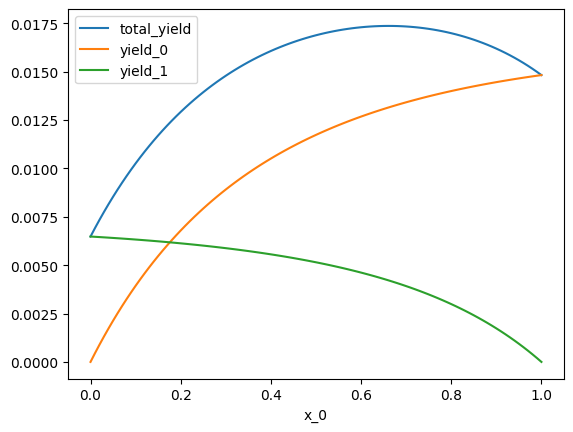

In [1]:
# plotting the curve of allocation to understand the apy characteristics
# yield = alloc * borrow_amount / (1 + alloc) * borrow_rate(borrow_amount/(1+alloc))


import pandas as pd
import numpy as np
from sturdy.pools import generate_assets_and_pools
from sturdy.utils.misc import supply_rate

pools ={'0': {'pool_id': '0', 'base_rate': 0.02, 'base_slope': 0.067, 'kink_slope': 0.19, 'optimal_util_rate': 0.85, 'borrow_amount': 0.65, 'reserve_size': 1.0}, '1': {'pool_id': '1', 'base_rate': 0.01, 'base_slope': 0.037, 'kink_slope': 0.956, 'optimal_util_rate': 0.75, 'borrow_amount': 0.55, 'reserve_size': 1.0}}
# init_assets_and_pools = generate_assets_and_pools()

# x = np.arange(0, 1.1, 0.01)
# df = pd.DataFrame({'x': x})
# labels = [str(i) for i in range(len(pools))]
# for label in labels:
#     df[label] = [supply_rate(x, pools[label]) for x in df['x']]
# df[['x', '0', '1']].plot(0)
# df.plot(0)
print(pools['1'])
x = np.arange(0, 1.01, 0.01)
y = 1 - x
df = pd.DataFrame({'x_0': x, 'x_1': y})

labels = [str(i) for i in range(len(pools))]
for label in labels:
    yields = []
    reserve_sizes = []
    util_rates = []
    for allocation in df[f'x_{label}']:
        reserve_size = pools[label]['reserve_size'] + allocation
        util_rate = pools[label]['borrow_amount'] / reserve_size
        pool_yield = allocation * supply_rate(util_rate, pools[label])
        yields.append(pool_yield)
        reserve_sizes.append(reserve_size)
        util_rates.append(util_rate)
    df[f'yield_{label}'] = yields
    df[f'reserve_{label}'] = reserve_sizes
    df[f'util_rate_{label}'] = util_rates

df['total_yield'] = df['yield_0'] + df['yield_1']
df['total_reserve'] = df['reserve_0'] + df['reserve_1']
df[['x_0', 'total_yield', 'yield_0', 'yield_1']].plot(0)
# df[df['x_0'] > 0.6]


In [41]:
# allocations = {'0': 0.93, '1': 0.07}
allocations = {'0': 0.0, '1': 1}
uid = '0'
util_rate = allocations[uid] / pools[uid]['reserve_size']
pool_yield = allocations[uid] * supply_rate(
    util_rate, pools[uid]
)
pool_yield

0.0

{'pool_id': '0', 'base_rate': 0.03, 'base_slope': 0.094, 'kink_slope': 0.575, 'optimal_util_rate': 0.65, 'borrow_amount': 0.8, 'reserve_size': 1.0}


<Axes: xlabel='x'>

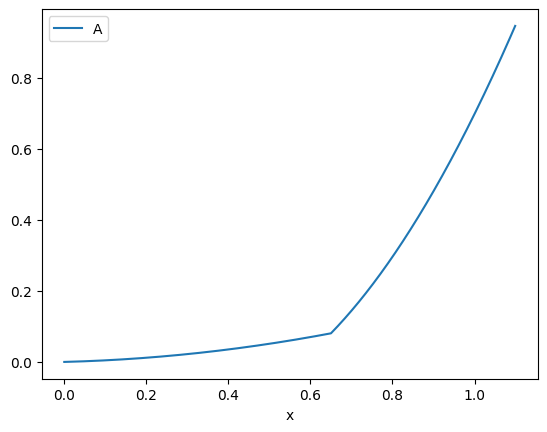

In [27]:
print(pools['0'])
x = np.arange(0, 1.1, 0.001)
df = pd.DataFrame({'x': x})
df['A'] = [supply_rate(x, pools['0']) for x in df['x']]
df.plot(x='x', y='A')